In [8]:
pip install mlflow

In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

print("Tensorflow Version",tf.__version__)

Tensorflow Version 2.15.0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
df_entero = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',
                 encoding = 'latin',header=None)
df_entero.head()

0           1                             2         3                4  \
0  0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                                   5  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....

In [12]:
df_entero.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df_entero.head()

sentiment          id                          date     query  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

           user_id                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....

In [21]:
df_entero.describe()

sentiment            id
count  1.600000e+06  1.600000e+06
mean   2.000000e+00  1.998818e+09
std    2.000001e+00  1.935761e+08
min    0.000000e+00  1.467810e+09
25%    0.000000e+00  1.956916e+09
50%    2.000000e+00  2.002102e+09
75%    4.000000e+00  2.177059e+09
max    4.000000e+00  2.329206e+09

In [66]:
DATA_SIZE = 10000

In [67]:
df = df_entero.drop(['id', 'date', 'query', 'user_id'], axis=1)
df = df.sample(n=DATA_SIZE, random_state=42)
df.describe()

sentiment
count  10000.000000
mean       1.998400
std        2.000099
min        0.000000
25%        0.000000
50%        0.000000
75%        4.000000
max        4.000000

In [68]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

sentiment                                               text
541200  Negative             @chrishasboobs AHHH I HOPE YOUR OK!!! 
750     Negative  @misstoriblack cool , i have no tweet apps  fo...
766711  Negative  @TiannaChaos i know  just family drama. its la...
285055  Negative  School email won't open  and I have geography ...
705995  Negative                             upper airways problem

Text(0.5, 1.0, 'Sentiment Data Distribution')

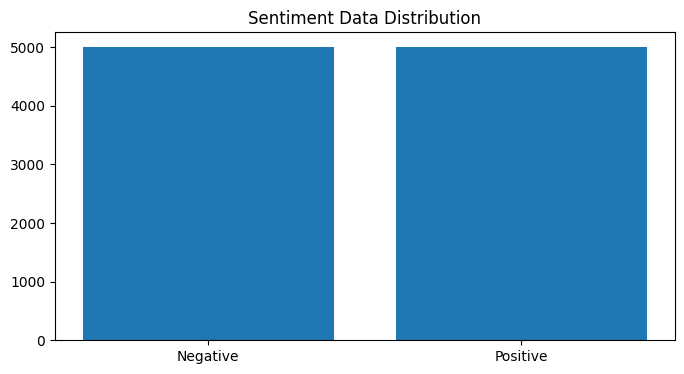

In [69]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [70]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [71]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [72]:
df.text = df.text.apply(lambda x: preprocess(x))

Positive

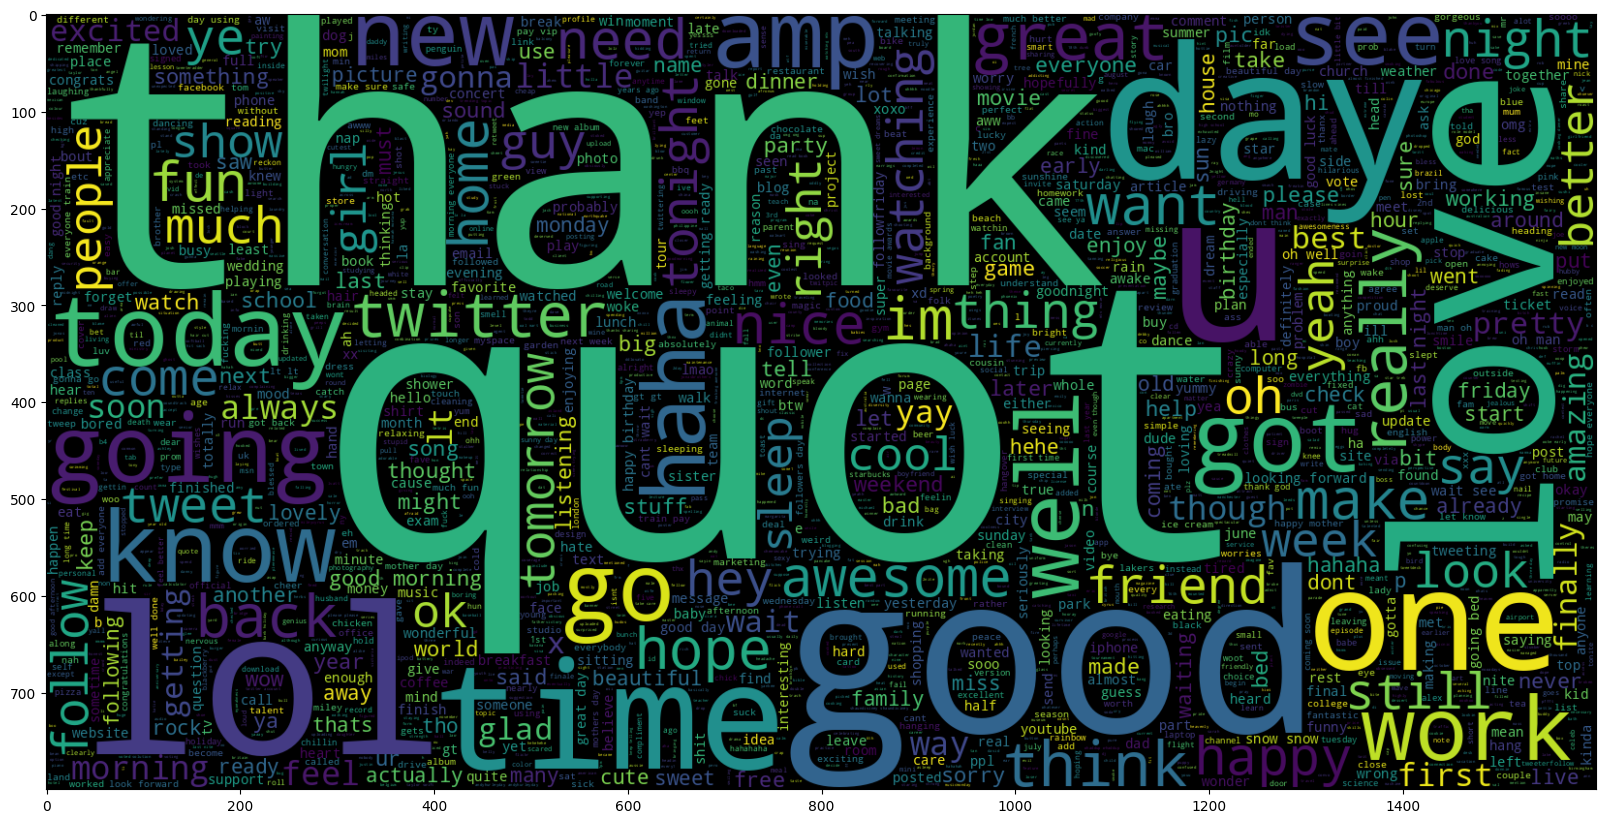

In [73]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

Negative

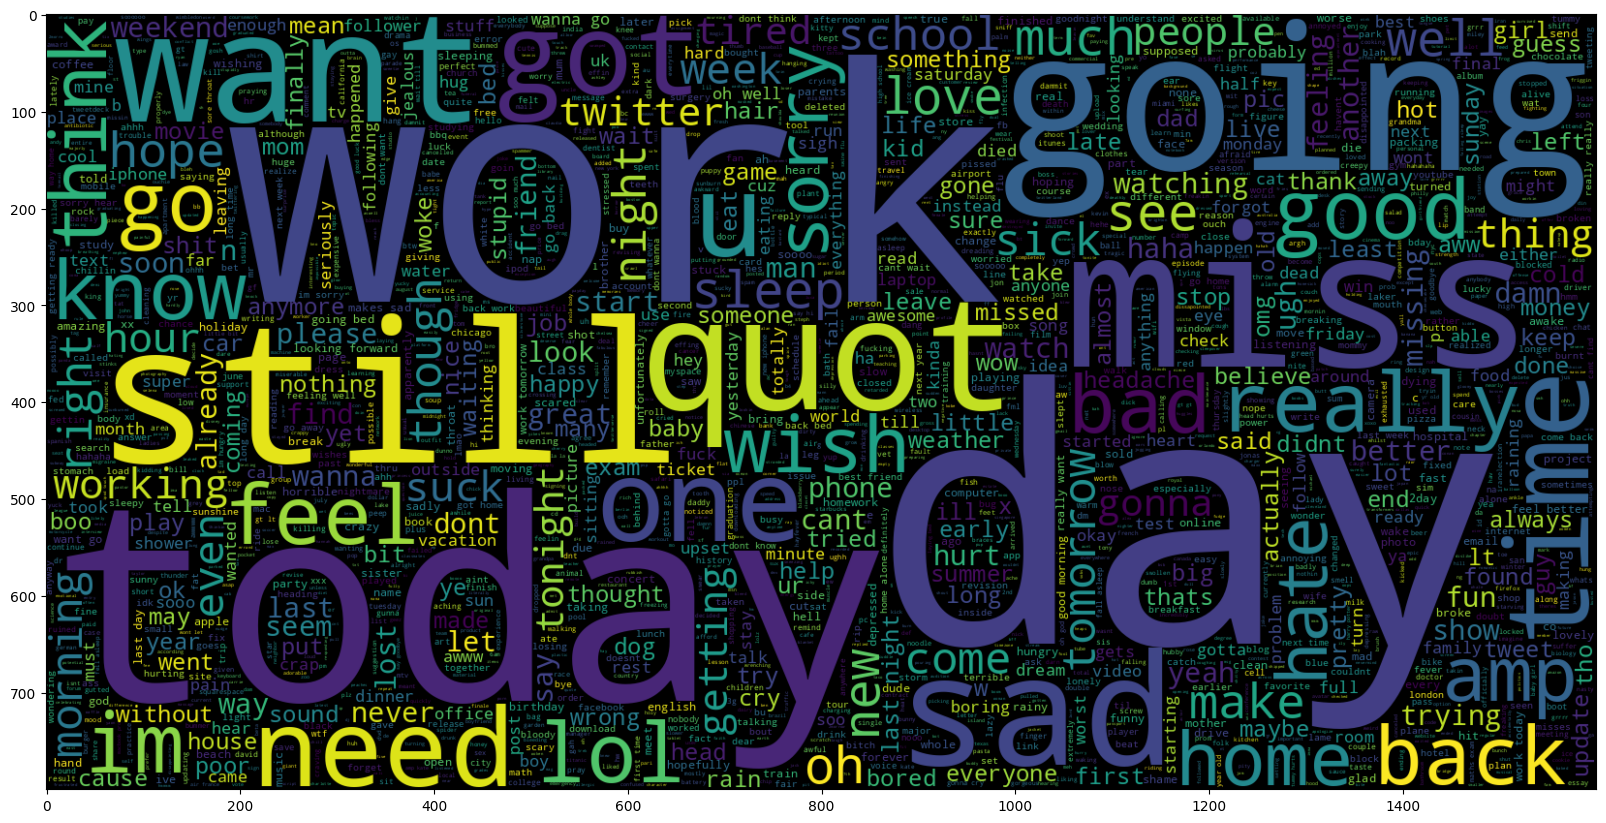

In [74]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

Train and Test Split

In [75]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [76]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=7)
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 8000
Test Data size 2000


In [77]:
train_data.head(10)

sentiment                                               text
688462   Negative  even given tweetdeck chance updated released i...
642294   Negative                                                   
1125008  Positive                          key sing lemme see u know
1095026  Positive  lol seems someone put bulls eye back ushikwapo...
156462   Negative  need product keeps hair curly frizzy woolly ma...
658474   Negative                                 mine still shipped
162059   Negative                   shorry bebeh okeh ada one chance
1293628  Positive                          soon going germany oh joy
643173   Negative              insomniac fuck ihatethis gf come home
486622   Negative                  bruv theres perv forumm loooooool

In [78]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 12312


In [79]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (8000, 30)
Testing X Shape: (2000, 30)


In [80]:
labels = train_data.sentiment.unique().tolist()

In [81]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (8000, 1)
y_test shape: (2000, 1)


In [40]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-07-13 16:40:16--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-07-13 16:40:16--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-07-13 16:40:16--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [82]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 512
EPOCHS = 10

In [83]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [84]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [85]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [50]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint


In [86]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [87]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [53]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


Training on GPU...


In [88]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
16/16 [==============================] - 11s 207ms/step - loss: 0.6710 - accuracy: 0.5920 - val_loss: 0.6155 - val_accuracy: 0.6500 - lr: 0.0010
Epoch 2/10
16/16 [==============================] - 4s 224ms/step - loss: 0.6024 - accuracy: 0.6841 - val_loss: 0.5985 - val_accuracy: 0.6695 - lr: 0.0010
Epoch 3/10
16/16 [==============================] - 5s 337ms/step - loss: 0.5630 - accuracy: 0.7144 - val_loss: 0.5748 - val_accuracy: 0.6920 - lr: 0.0010
Epoch 4/10
16/16 [==============================] - 5s 343ms/step - loss: 0.5352 - accuracy: 0.7254 - val_loss: 0.5763 - val_accuracy: 0.6855 - lr: 0.0010
Epoch 5/10
16/16 [==============================] - 6s 360ms/step - loss: 0.5068 - accuracy: 0.7495 - val_loss: 0.5687 - val_accuracy: 0.6880 - lr: 0.0010
Epoch 6/10
16/16 [==============================] - 3s 165ms/step - loss: 0.4718 - accuracy: 0.7744 - val_loss: 0.5722 - val_accuracy: 0.6895 - lr: 0.0010
Epoch 7/10
16/16 [==============================] - 3s 159ms/step - l

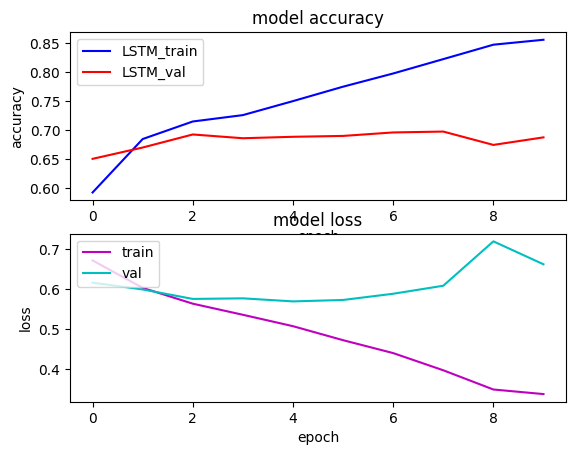

In [89]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [90]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

1/1 [==============================] - 1s 911ms/step


In [91]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

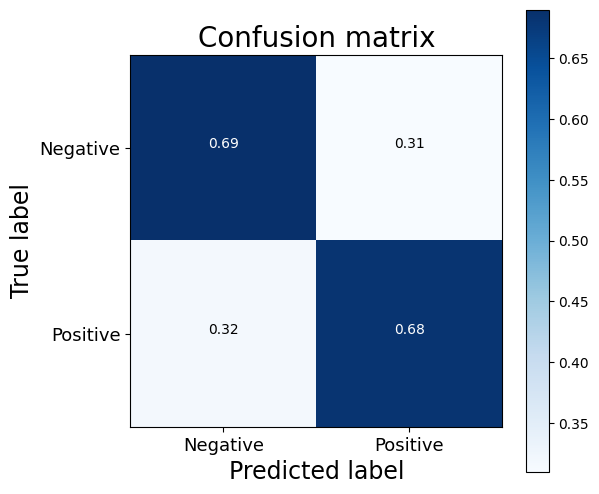

In [92]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

In [93]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.68      0.69      0.68       984
    Positive       0.69      0.68      0.69      1016

    accuracy                           0.69      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.69      0.69      0.69      2000



In [61]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [94]:
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

63/63 [==============================] - 2s 27ms/step


In [6]:
!pip install pyngrok

In [4]:
from mlflow.tracking import MlflowClient
client = MlflowClient()

In [64]:
import mlflow

In [95]:
mlflow.set_experiment('Twitter Sentiment Classifier with Accuracy')
with mlflow.start_run(run_name='Train N2'):
    mlflow.log_param("epochs", EPOCHS)
    mlflow.log_param("batch_size", BATCH_SIZE)
    mlflow.log_param("dataset_size", DATA_SIZE)
    mlflow.log_param("embedding_dimension", EMBEDDING_DIM)
    mlflow.log_param("learning_rate", LR)

    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("roc_auc", roc_auc)

    np.savetxt("confusion_matrix.csv", conf_matrix, delimiter=",")
    mlflow.log_artifact("confusion_matrix.csv")

    mlflow.keras.log_model(model, "sentiment-classication-lstm-1")

print("Métricas registradas en MLflow")

2024/07/13 17:01:54 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


Métricas registradas en MLflow


In [7]:
get_ipython().system_raw('mlflow ui --port 5000 &')

from pyngrok import ngrok

ngrok.kill()

NGROK_AUTH_TOKEN = '2iej7SHbzLmj9OIUiT2MQmHWjQv_xXsqemx3c28asG9u1mLZ'
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

ngrok_tunnel = ngrok.connect(addr='5000', proto='http', bind_tls=True)
print('El tracking UI:', ngrok_tunnel.public_url)

El tracking UI: https://39e9-34-168-140-83.ngrok-free.app


Entrenamiento con 1000 Tweets

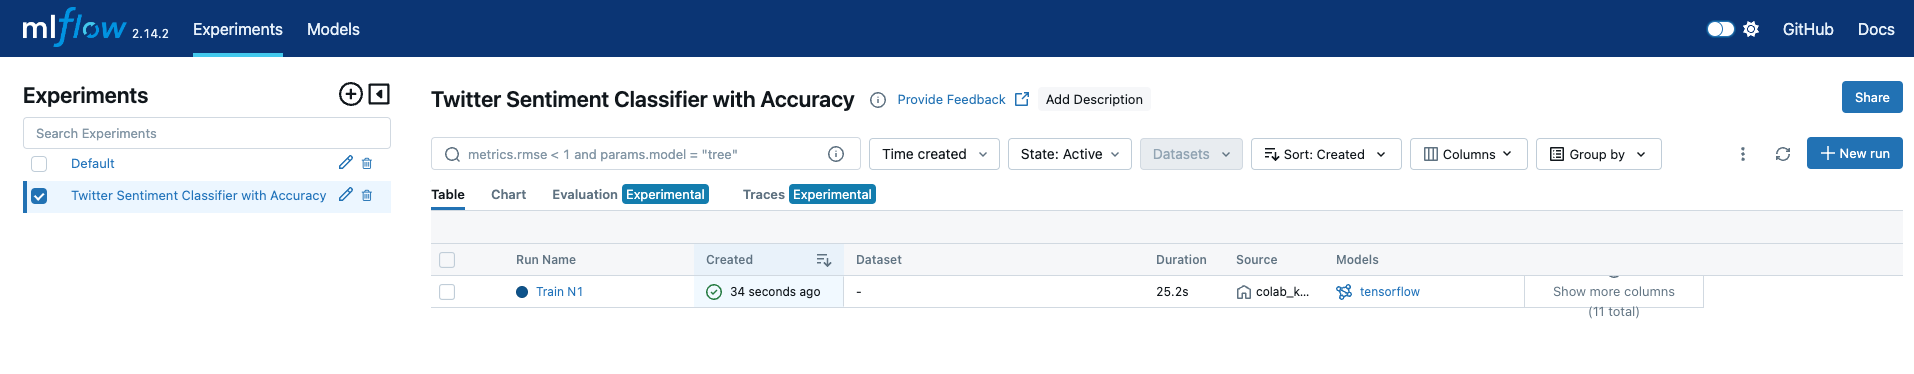

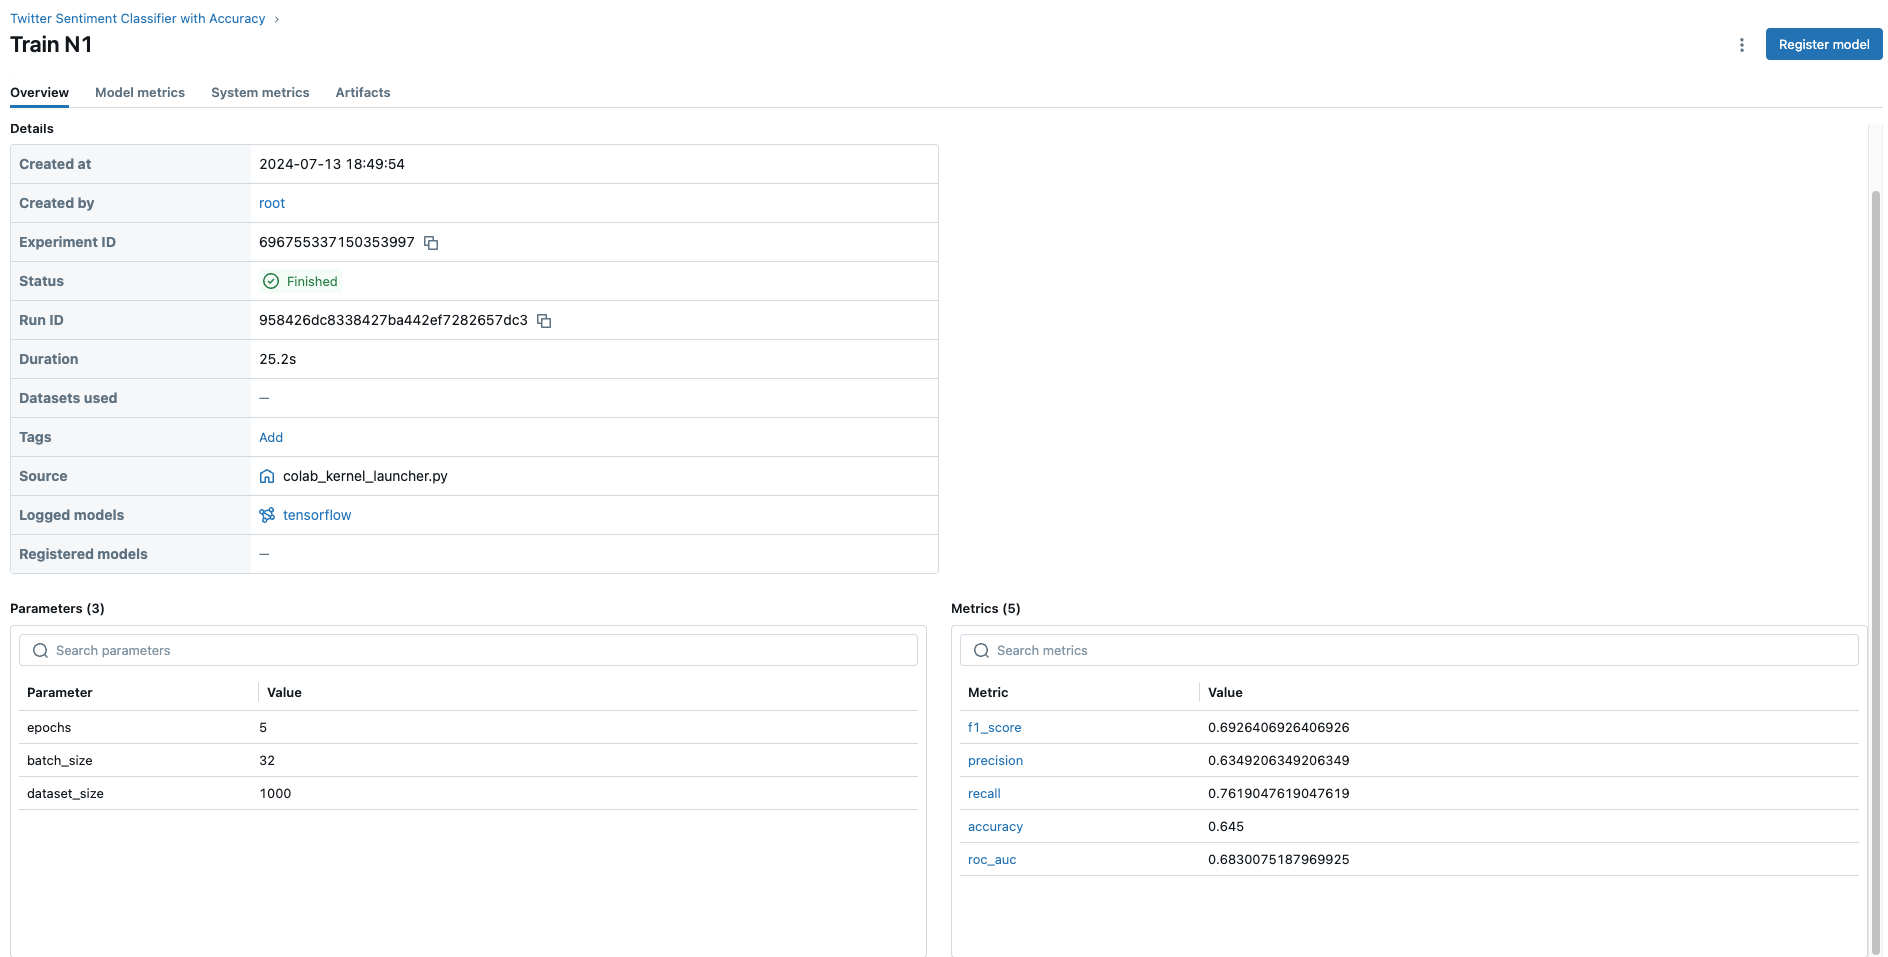

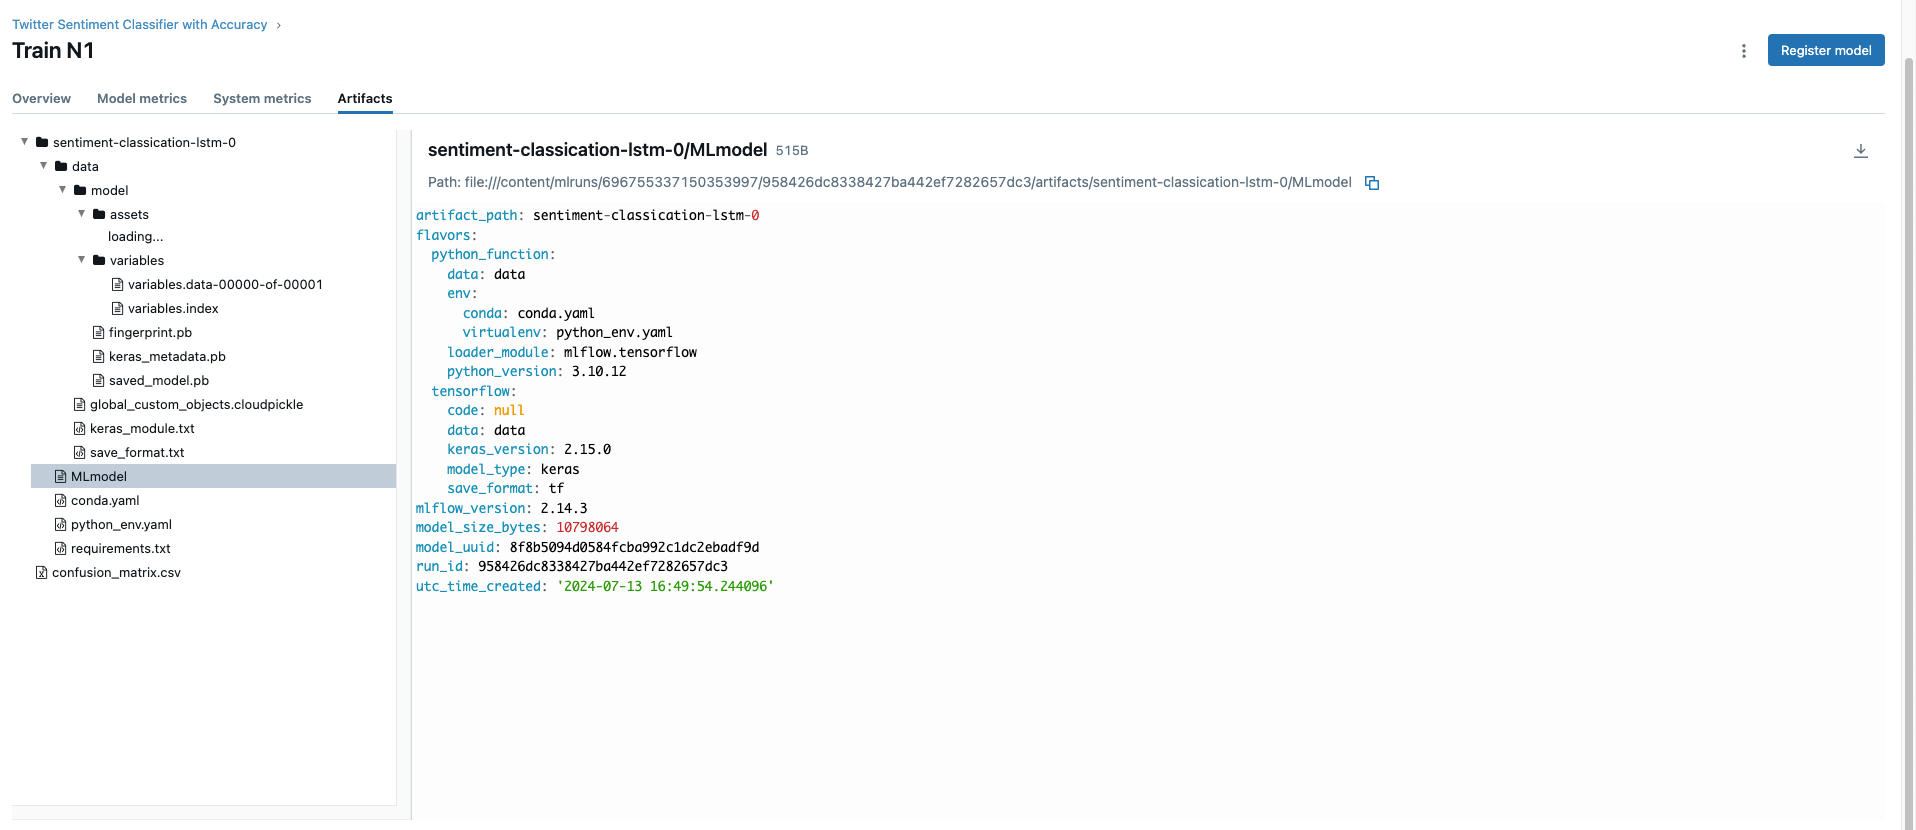

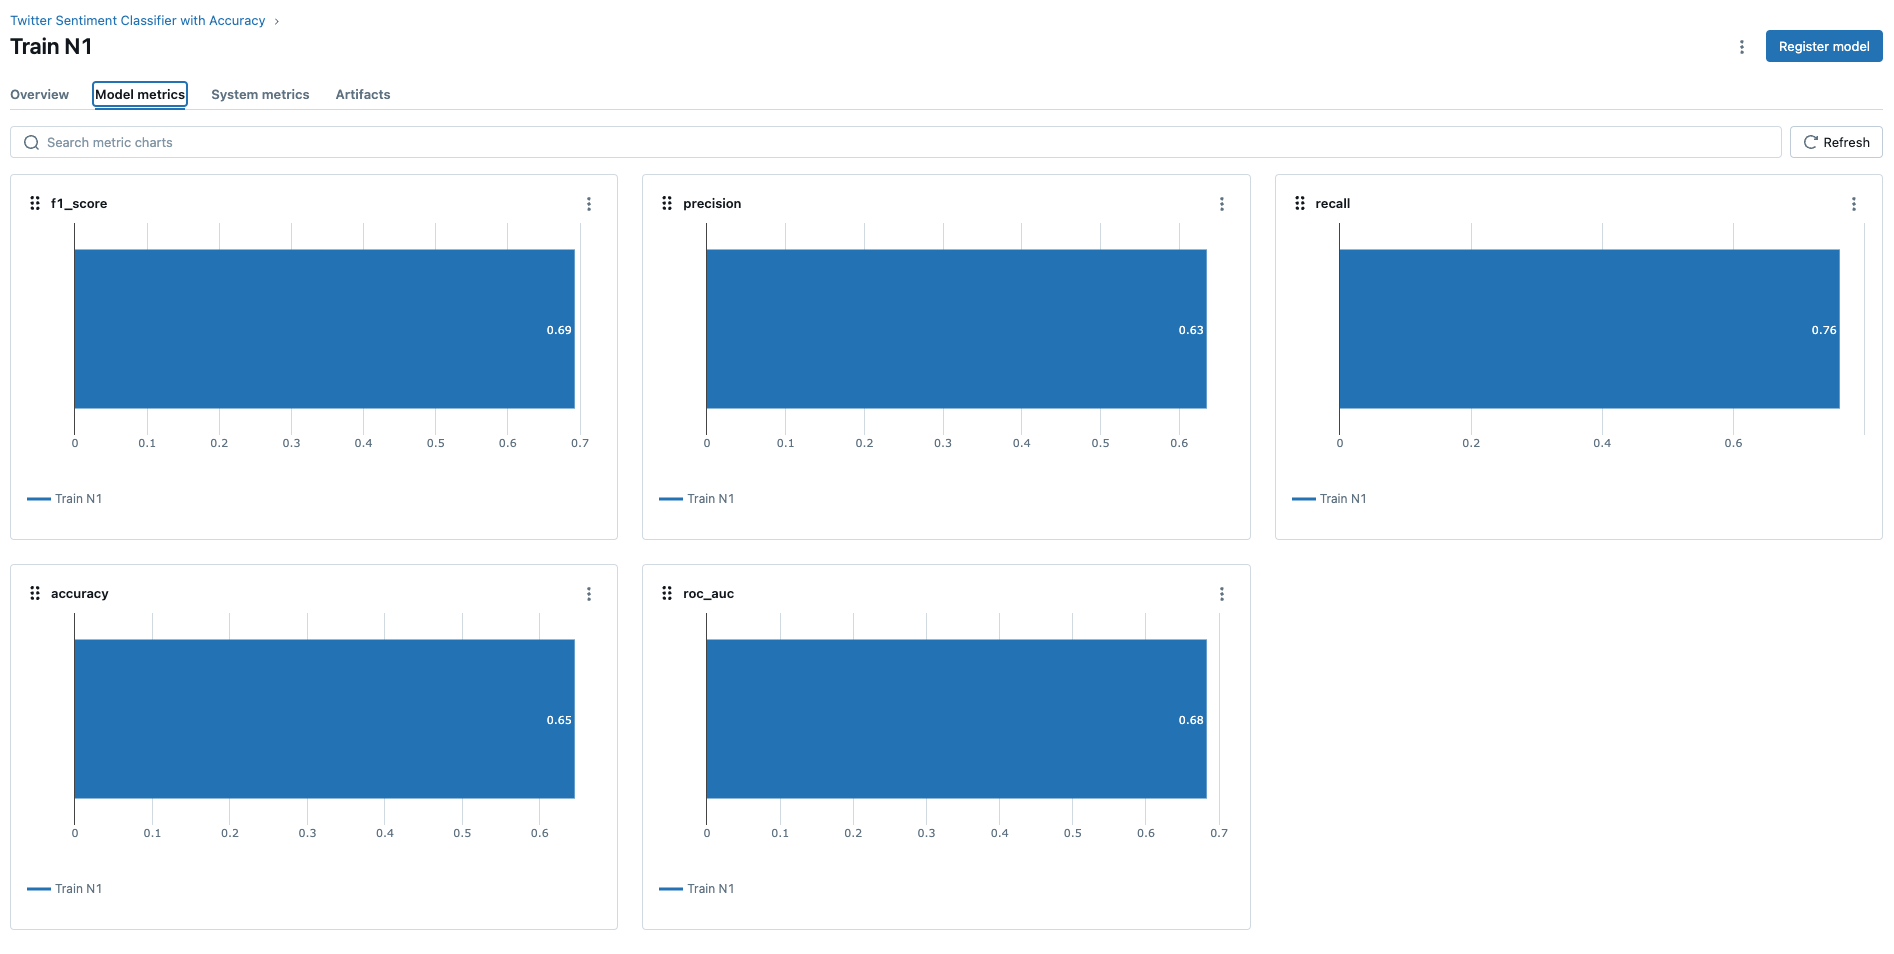



Comparando dos experimentos

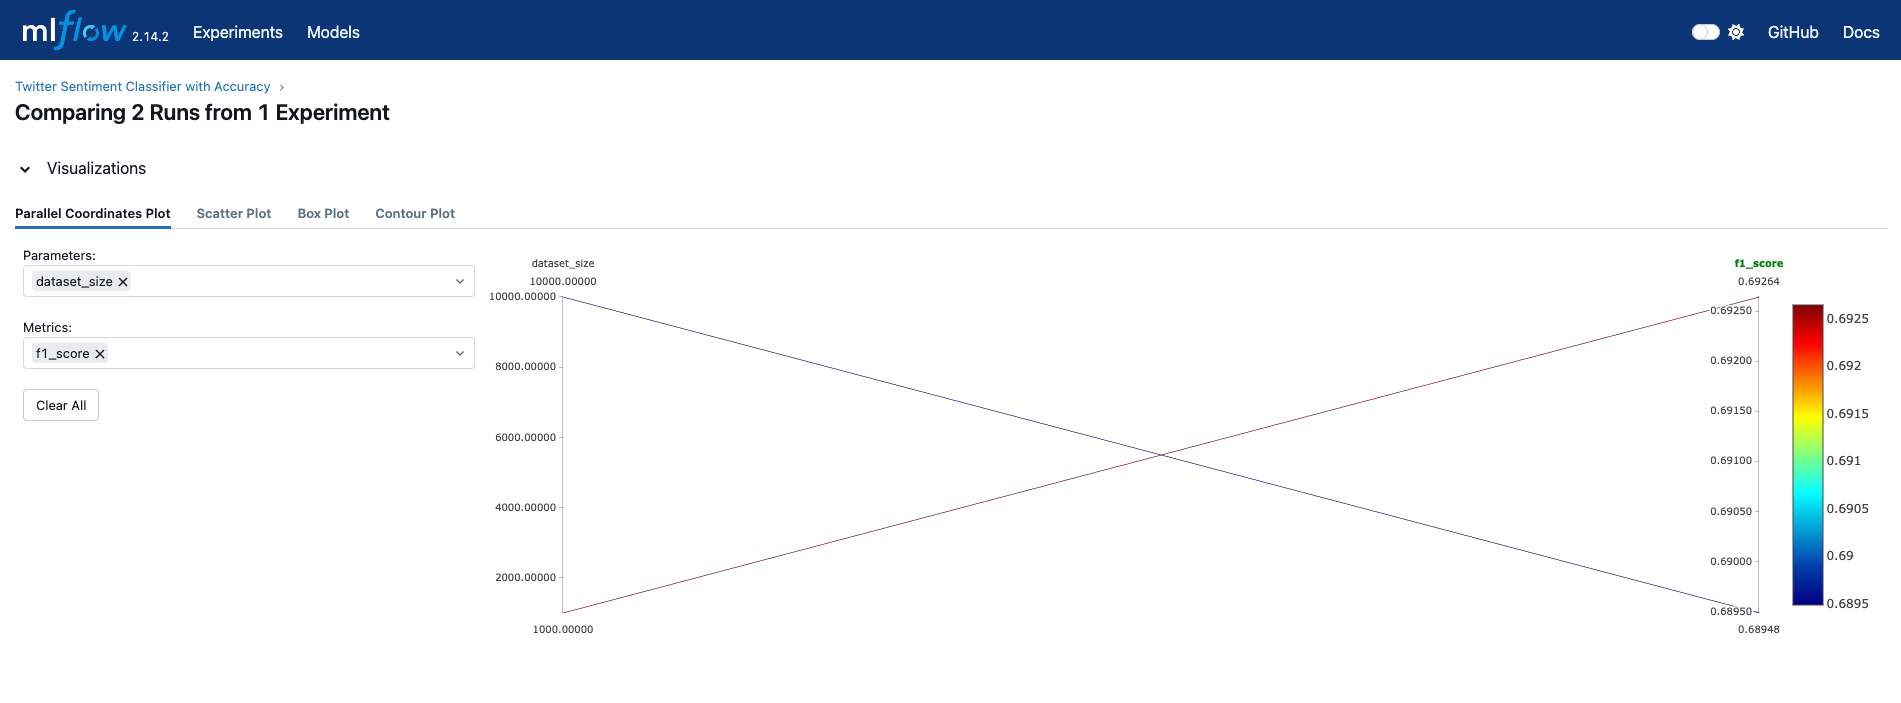

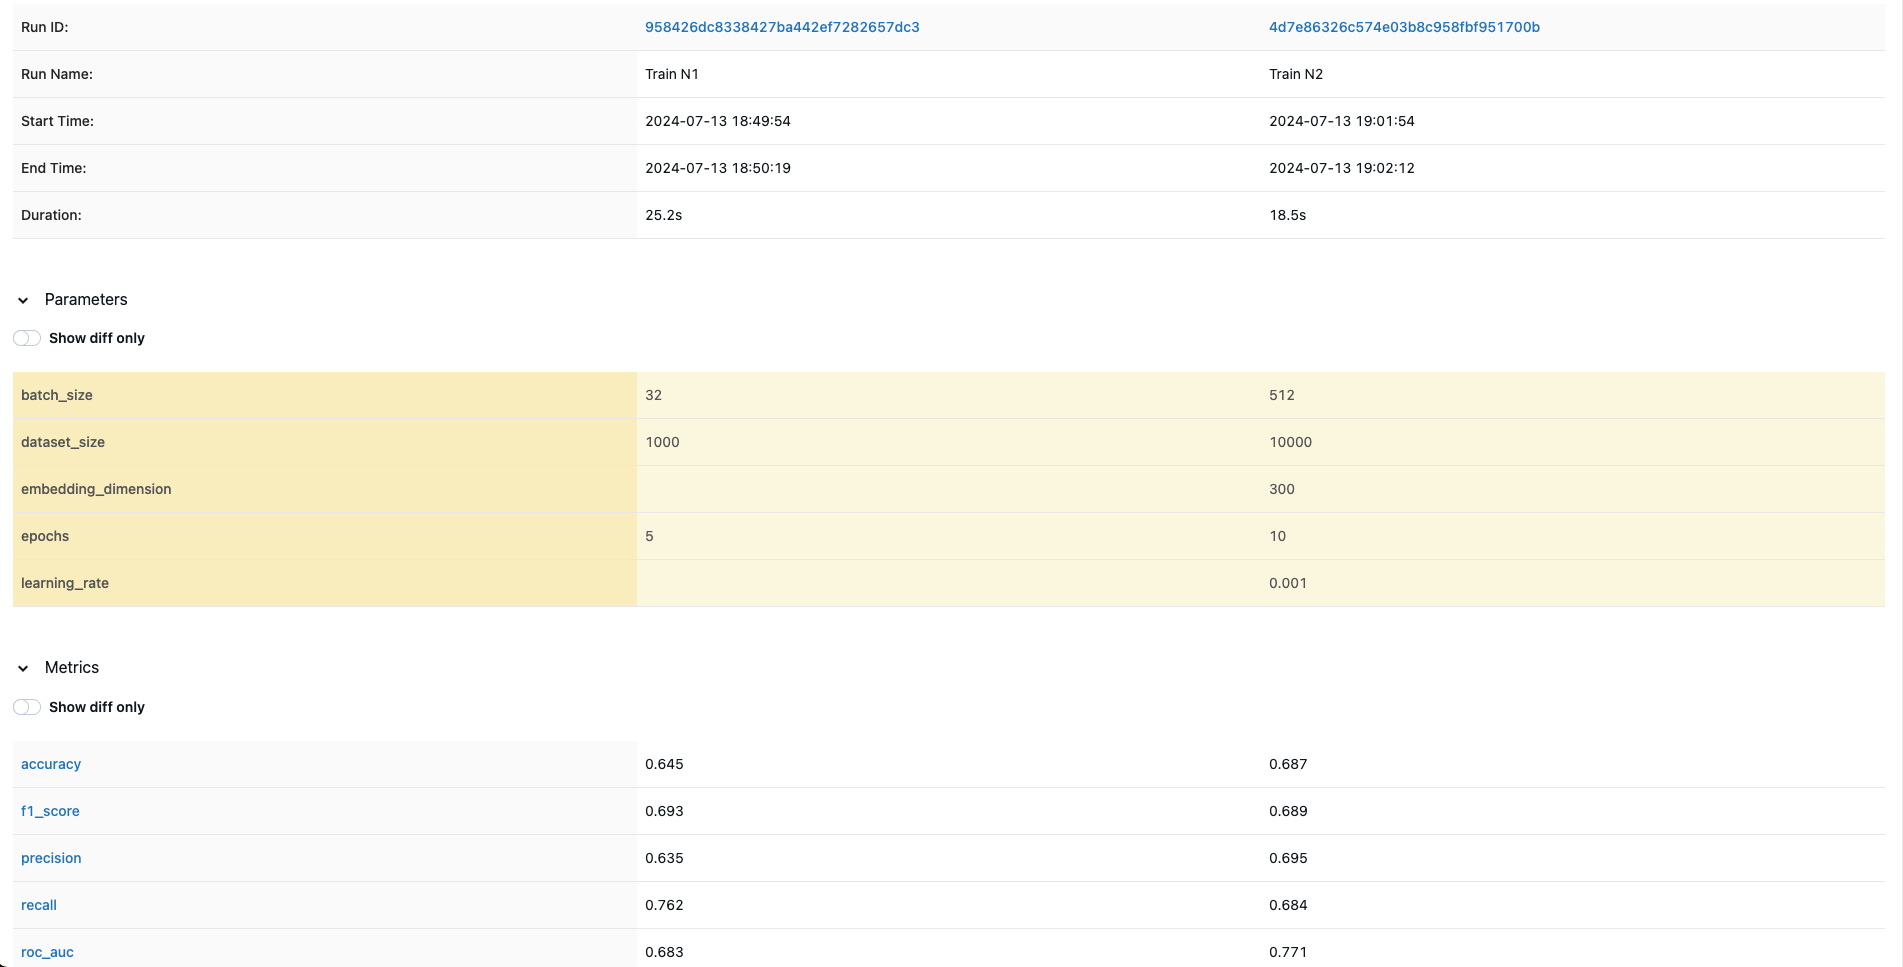


In [96]:
ngrok.kill()

In [ ]:
%%writefile funciones.py
import tensorflow as tf
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from mlflow.tracking import MlflowClient
import mlflow

def argumentos():
    parser = argparse.ArgumentParser(description='__main__')
    parser.add_argument('--nombre_job', type=str, help='Job name')
    parser.add_argument('--data_size', nargs='+', type=int, help='Sample size')
    return parser.parse_args()

def load_dataset():
    df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding = 'latin',header=None)
    return df

def data_treatment(df, data_size):
    DATA_SIZE = data_size
    df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']

    df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)
    df = df.sample(n=DATA_SIZE, random_state=42)

    lab_to_sentiment = {0:"Negative", 4:"Positive"}
    def label_decoder(label):
      return lab_to_sentiment[label]
    df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))

    val_count = df.sentiment.value_counts()

    stop_words = stopwords.words('english')
    stemmer = SnowballStemmer('english')

    text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

    def preprocess(text, stem=False):
      text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
      tokens = []
      for token in text.split():
        if token not in stop_words:
          if stem:
            tokens.append(stemmer.stem(token))
          else:
            tokens.append(token)
      return " ".join(tokens)

    df.text = df.text.apply(lambda x: preprocess(x))

    TRAIN_SIZE = 0.8
    MAX_NB_WORDS = 100000
    MAX_SEQUENCE_LENGTH = 30

    train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE, random_state=7)

    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(train_data.text)

    word_index = tokenizer.word_index
    vocab_size = len(tokenizer.word_index) + 1
    print("Vocabulary Size :", vocab_size)

    x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                            maxlen = MAX_SEQUENCE_LENGTH)
    x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                          maxlen = MAX_SEQUENCE_LENGTH)

    print("Training X Shape:",x_train.shape)
    print("Testing X Shape:",x_test.shape)

    labels = train_data.sentiment.unique().tolist()

    encoder = LabelEncoder()
    encoder.fit(train_data.sentiment.to_list())

    y_train = encoder.transform(train_data.sentiment.to_list())
    y_test = encoder.transform(test_data.sentiment.to_list())

    y_train = y_train.reshape(-1,1)
    y_test = y_test.reshape(-1,1)

    return x_train, x_test, y_train, y_test

def mlflow_tracking(nombre_job, x_train, x_test, y_train, y_test):
    mlflow_ui_process = subprocess.Popen(['mlflow', 'ui', '--port', '5000'])
    print(mlflow_ui_process)
    time.sleep(5)
    mlflow.set_experiment(nombre_job)

    with mlflow.start_run() as run:
        GLOVE_EMB = '/content/glove.6B.300d.txt'
        EMBEDDING_DIM = 300
        LR = 1e-3
        BATCH_SIZE = 512
        EPOCHS = 10

        embeddings_index = {}

        f = open(GLOVE_EMB)
        for line in f:
          values = line.split()
          word = value = values[0]
          coefs = np.asarray(values[1:], dtype='float32')
          embeddings_index[word] = coefs
        f.close()

        print('Found %s word vectors.' %len(embeddings_index))

        embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
        for word, i in word_index.items():
          embedding_vector = embeddings_index.get(word)
          if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

        embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                                  EMBEDDING_DIM,
                                                  weights=[embedding_matrix],
                                                  input_length=MAX_SEQUENCE_LENGTH,
                                                  trainable=False)

        sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
        embedding_sequences = embedding_layer(sequence_input)
        x = SpatialDropout1D(0.2)(embedding_sequences)
        x = Conv1D(64, 5, activation='relu')(x)
        x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
        x = Dense(512, activation='relu')(x)
        x = Dropout(0.5)(x)
        x = Dense(512, activation='relu')(x)
        outputs = Dense(1, activation='sigmoid')(x)
        model = tf.keras.Model(sequence_input, outputs)

        model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
                      metrics=['accuracy'])
        ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                            min_lr = 0.01,
                                            monitor = 'val_loss',
                                            verbose = 1)

        history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                            validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

        y_pred_prob = model.predict(x_test)
        y_pred = (y_pred_prob > 0.5).astype(int)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_prob)
        conf_matrix = confusion_matrix(y_test, y_pred)

        mlflow.log_param("epochs", EPOCHS)
        mlflow.log_param("batch_size", BATCH_SIZE)
        mlflow.log_param("dataset_size", DATA_SIZE)
        mlflow.log_param("embedding_dimension", EMBEDDING_DIM)
        mlflow.log_param("learning_rate", LR)

        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("roc_auc", roc_auc)

        np.savetxt("confusion_matrix.csv", conf_matrix, delimiter=",")
        mlflow.log_artifact("confusion_matrix.csv")

        mlflow.keras.log_model(model, "sentiment-classication-lstm-1")

In [ ]:
# main.py
%%writefile main.py
from funciones import argumentos, load_dataset, mlflow_tracking

def main():
  print("Eejcutamos el main")
  args_values = argumentos()
  df = load_dataset()
  x_train, x_test, y_train, y_test = data_treatment(df, args_values.nombre_job)
  mlflow_tracking(args_values.nombre_job, x_train, x_test, y_train, y_test)

if __name__ == "__main__":
  main()